## Some EDA for NCAAB March Madness Project

Importing required packages

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

Loading in the data and exploring it a bit

In [8]:
stats_past = pd.read_csv(r'.\stats_df.csv', index_col=0)

stats_past.head()

,Result,eFG%,TO%,OR%,FTR,Team
0,1,43.4,22.6,35.1,60.4,Kansas
1,0,22.3,18.2,38.5,48.2,Kansas
2,1,65.4,14.4,36.0,48.1,Kansas
3,1,54.7,17.6,40.6,47.2,Kansas
4,1,57.1,25.2,62.1,69.4,Kansas


In [9]:
stats_past.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53514 entries, 0 to 53513
Data columns (total 6 columns):
Result    53514 non-null int64
eFG%      53514 non-null float64
TO%       53514 non-null float64
OR%       53514 non-null float64
FTR       53514 non-null float64
Team      53514 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ MB


Converting Result to a categorical variable and getting counts of wins and losses

In [10]:
stats_past['Result'] = stats_past['Result'].astype('category')
stats_past['Result'].value_counts()

1    26834
0    26680
Name: Result, dtype: int64

The values are extremely close which is expected.

Creating list of numeric columns and getting summary stats

In [11]:
numeric = ['eFG%', 'TO%', 'OR%', 'FTR']
stats_past[numeric].describe()

,eFG%,TO%,OR%,FTR
count,53514.000000,53514.000000,53514.000000,53514.000000
mean,50.439382,18.479452,29.131779,35.915854
std,8.725019,5.416765,9.208672,15.743814
min,18.000000,1.400000,0.000000,0.000000
25%,44.500000,14.700000,22.700000,24.600000
50%,50.000000,18.200000,28.900000,33.900000
75%,56.100000,22.000000,35.300000,45.000000
max,91.700000,45.900000,69.100000,137.500000


Creating boxplot of all numeric columns

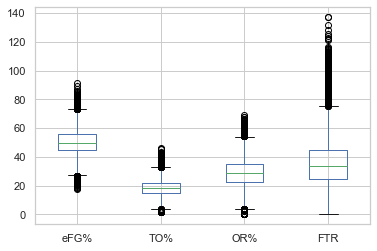

In [12]:
stats_past[numeric].plot(kind='box')
plt.show()

Plotting distribution plot of each numeric column

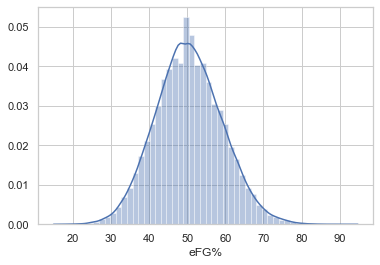

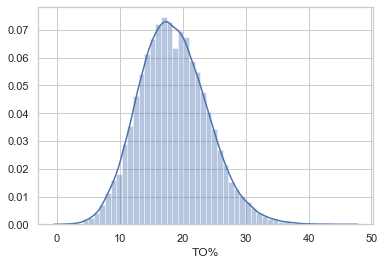

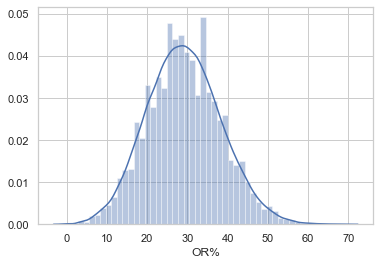

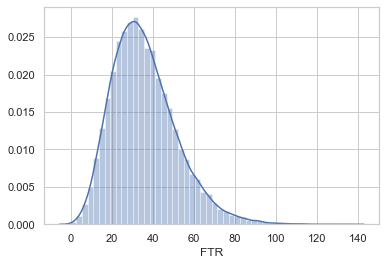

In [13]:
for col in numeric:
    sns.distplot(stats_past[col])
    plt.show()

Calculating Z score for each column and removing outliers

In [14]:
stats_Z = np.abs(stats.zscore(stats_past[numeric]))
stats_final = stats_past[(stats_Z < 3).all(axis=1)]

Plotting a pairplot to see scatterplot of all variables

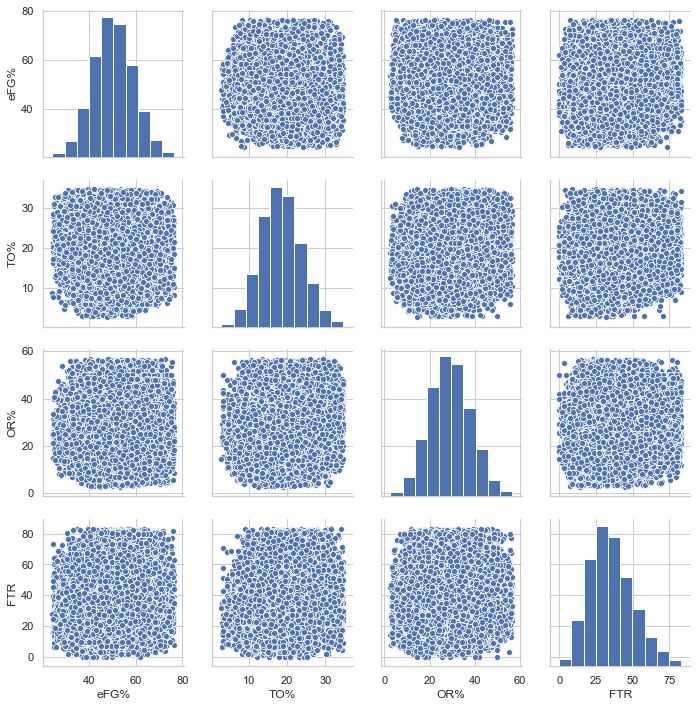

In [15]:
sns.pairplot(stats_final[numeric])
plt.show()

Creating correlation heatmap to investigate

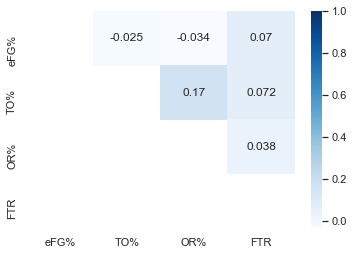

In [16]:
mask = np.tril(stats_final[numeric].corr())
sns.heatmap(stats_final[numeric].corr(), cmap='Blues', mask=mask,
            annot=True)
plt.show()

In [17]:
#Exporting stats with outliers removed to csv
stats_final.to_csv(r'.\stats_final.csv')